# タイタニックデータの可視化
英国の客船，処女航海の1912年に北大西洋上で氷山に接触し沈没した。犠牲者が多数出た。映画で何度か上映されたため，世界的に非常に有名となった。この乗客に生存に関するデータがある。

In [37]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
#import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

FLAG_fig = False

In [38]:
titanic_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv" #トレニーングデータ読込み
#df = pd.read_csv(titanic_url) # df; DataFrame　の略
df= pd.read_csv("train.csv")
# df.to_csv('titanic_train.csv') # 読込んだデータの出力
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [40]:
df['Age'].fillna(df.Age.median(), inplace=True)

Ageは，幾つか欠損している。csvファイルでは空欄となっている。欠損レコードを省くとデータ数が激減するので，補完する。補完の考え方は幾つかあり，ここでは，中央値を採用する。

In [41]:
print(' type(df) is ',type(df),'\n','len(df) =',len(df))

 type(df) is  <class 'pandas.core.frame.DataFrame'> 
 len(df) = 891


28.0


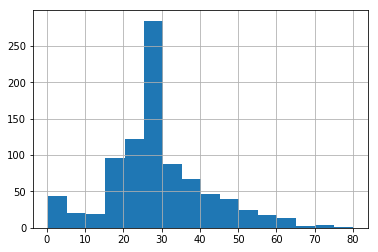

In [42]:
df['Age'].fillna(df.Age.median(), inplace=True) #inplace=True は，処理軽減のため，元データを処理する
print(df.Age.median())
hist = df['Age'].hist(bins=16)

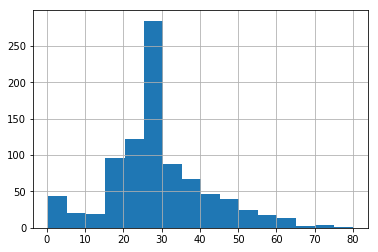

In [43]:
hist = df['Age'].hist(bins=16)
# matplotlibを用いた plt.hist(df['Age'],  bins=16)とほぼ同じ

if FLAG_fig: plt.savefig('fig_PLT_Titanic_hist_01.png')
plt.show()

乗客の年齢構成を見る

In [44]:
age1 = (df['Age'] < 15).sum()
age2 = ( (df['Age'] >= 15) & (df['Age'] < 60) ).sum()
age3 = (df['Age'] >= 60).sum()
print(age1, age2, age3, (age1+age2+age3))

78 787 26 891


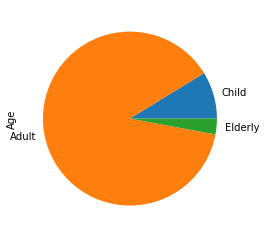

In [45]:
series = pd.Series([age1, age2, age3], index=['Child', 'Adult', 'Elderly'], name='Age')
series.plot.pie(figsize=(4, 4))

if FLAG_fig: plt.savefig('fig_PLT_Titanic_pie_01.png')
plt.show()

男女別に生存のクロス集計（cross tabulation）を見る

In [46]:
cross_01 = df.pivot_table(index=['Survived'], columns=['Sex'],  \
                          values=['PassengerId'],aggfunc='count', fill_value=0)
print(cross_01)

         PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109


この棒グラフを見る

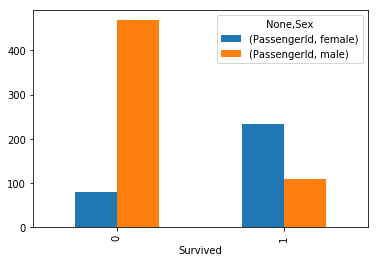

In [47]:
cross_01.plot(kind='bar')

if FLAG_fig: plt.savefig('fig_PLT_Titanic_cross_01_hist.png')
plt.show()

船室のクラス（Pclass）と生存のクロス集計を見る

In [48]:
cross_02 = df.pivot_table(index=['Survived'], columns=['Pclass'], \
                 values=['PassengerId'], aggfunc='count', fill_value=0)
cross_02

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

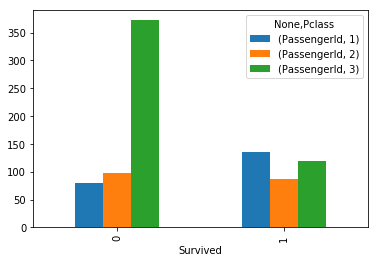

In [49]:
cross_02.plot(kind='bar')

if FLAG_fig: plt.savefig('fig_PLT_Titanic_cross_02_hist.png')
plt.show()

上記の棒グラフを積み上げ方式に変換する

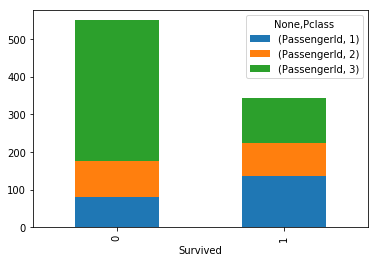

In [50]:
cross_02.plot(kind='bar', stacked=True)

if FLAG_fig: plt.savefig('fig_PLT_Titanic_cross_01_hist_stack.png')
plt.show()

columnsの階層化
Sexの分類のもとにPclassの分類を階層化する

In [51]:
cross_03_1 = df.pivot_table(index=['Survived'], columns=['Sex', 'Pclass'], values=['PassengerId'], aggfunc='count', fill_value=0)
cross_03_1

PassengerId                      
Sex           female         male         
Pclass             1   2   3    1   2    3
Survived                                  
0                  3   6  72   77  91  300
1                 91  70  72   45  17   47

ここまでのクロス集計は'count'であるから，valuesは何を指定してもよい。ただし，indexとcolumnsを指定したラベルは省く。

In [52]:
cross_03_2 = df.pivot_table(index=['Survived'], columns=['Sex', 'Pclass'], values=['Name'], aggfunc='count', fill_value=0)
cross_03_2

Name                      
Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

valuesを外すと，sexの上に，他の全てのラベルが階層化される

In [53]:
cross_04 = df.pivot_table(index=['Survived'], columns=['Sex'], aggfunc='count', fill_value=0)
cross_04

Age       Cabin      Embarked        Fare        Name       Parch  \
Sex      female male female male   female male female male female male female   
Survived                                                                        
0            81  468      6   62       81  468     81  468     81  468     81   
1           233  109     91   45      231  109    233  109    233  109    233   

              PassengerId      Pclass       SibSp      Ticket       
Sex      male      female male female male female male female male  
Survived                                                            
0         468          81  468     81  468     81  468     81  468  
1         109         233  109    233  109    233  109    233  109

In [54]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
cross_01 = df.pivot_table